In [1]:
import numpy as np
#from scipy.linalg import *
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame,Series

In [2]:
T1 = 100 #°C
T2 = 20 #°C
L = 0.1 #m
A = 1 #m²

In [3]:
def k(T):
    #função da condutividade
    k = 1.6 - 0.01*T
    return k

In [12]:
#Tamanho da malha
mesh = 6
deltax = L/(mesh -1)

In [13]:
#chute inicial da Temperatura = linear
T_interpolacao = np.zeros(mesh)
T_resistencias = np.zeros(mesh)
x = np.zeros(mesh)

T_interpolacao[0] = T1
T_resistencias[0] = T1
x[0] = 0

T_interpolacao[mesh-1] = T2
T_resistencias[mesh-1] = T2
x[mesh-1] = L

for i in range(1,mesh-1):
    x[i] = x[i-1] + deltax
    T_interpolacao[i] = -800*x[i] +100
    T_resistencias[i] = -800*x[i] +100


In [14]:
#gauss-seidel
#método da interpolação

erro_interpolacao = 1.0
T_anterior_interpolacao = np.zeros(mesh)
erro_vetor_interpolacao = np.zeros(mesh)

n = 0 #numero de iterações

while (erro_interpolacao>1e-5):
    n = n+1
    for i in range(1,mesh-1):
        T_anterior_interpolacao[i] = T_interpolacao[i]
    
    for i in range(1,mesh-1):
        ae = (A*(k(T_interpolacao[i])+k(T_interpolacao[i+1]))/2)/deltax
        aw = (A*(k(T_interpolacao[i])+k(T_interpolacao[i-1]))/2)/deltax
        ap = ae + aw
        
        T_interpolacao[i] = (aw*T_interpolacao[i-1] + ae*T_interpolacao[i+1])/ap
        erro_vetor_interpolacao[i] = abs(T_interpolacao[i] - T_anterior_interpolacao[i])
        
    erro_interpolacao = erro_vetor_interpolacao.max()
    
        

In [15]:
#gauss-seidel
#método das resistências

erro_resistencias = 1.0
T_anterior_resistencias = np.zeros(mesh)
erro_vetor_resistencias = np.zeros(mesh)

n = 0 #numero de iterações

while (erro_resistencias>1e-5):
    n = n+1
    for i in range(1,mesh-1):
        T_anterior_resistencias[i] = T_resistencias[i]
    
    for i in range(1,mesh-1):
        ke = 2*k(T_resistencias[i])*k(T_resistencias[i+1])/(k(T_resistencias[i])+k(T_resistencias[i+1]))
        kw = 2*k(T_resistencias[i])*k(T_resistencias[i-1])/(k(T_resistencias[i])+k(T_resistencias[i-1]))
        
        ae = (A*ke)/deltax
        aw = (A*kw)/deltax
        ap = ae + aw
        
        T_resistencias[i] = (aw*T_resistencias[i-1] + ae*T_resistencias[i+1])/ap
        erro_vetor_resistencias[i] = abs(T_resistencias[i] - T_anterior_resistencias[i])
        
    erro_resistencias = erro_vetor_resistencias.max()

In [16]:
#solução analítica
T_analitico_tabela =160- (3600 +160000 * x)**0.5
x_plot = np.linspace(0,0.100,100)
T_analitico = 160- (3600 +160000 * x_plot)**0.5


(0, 0.1)

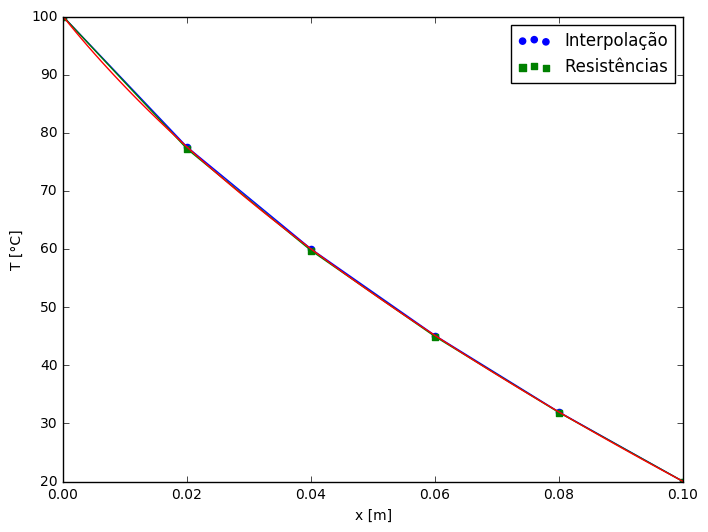

In [17]:
%matplotlib inline
fig = plt.figure(figsize=(8,6))
axis = fig.add_subplot(111)    
   
axis.plot(x, T_interpolacao,  color ='blue')
axis.scatter(x, T_interpolacao, color ='blue', label='Interpolação')

axis.plot(x, T_resistencias,  color ='green')
axis.scatter(x, T_resistencias, color ='green', label='Resistências', marker ='s')

axis.plot(x_plot,T_analitico ,  color ='red')



axis.set_ylabel('T [°C]')
axis.set_xlabel('x [m]')
axis.set_title('')
axis.legend(loc='best')
axis.set_ylim(20,100)
axis.set_xlim(0,0.1)

In [19]:
tabela_Temp = DataFrame()

tabela_Temp['Temperatura [°C]'] = T_analitico_tabela.round(6).tolist()
tabela_Temp['Posição [m]'] = x.round(6)
#tabela_Temp['Temp. Resistências [°C]'] = T_resistencias.round(6).tolist()
#tabela_Temp['Erro Resistências [°C]'] = np.absolute(T_exata_tabela-T_resistencias).round(6).tolist()

tabela_Temp['Temp. Interpolação [°C]'] = T_interpolacao.round(6).tolist()
tabela_Temp['|Erro| Interpolação [°C]'] = np.absolute(T_analitico_tabela-T_interpolacao).round(6).tolist()

tabela_Temp['Temp. Resistências [°C]'] = T_resistencias.round(6).tolist()
tabela_Temp['|Erro| Resistências [°C]'] = np.absolute(T_analitico_tabela-T_resistencias).round(6).tolist()

tabela_Temp

,Temperatura [°C],Posição [m],Temp. Interpolação [°C],|Erro| Interpolação [°C],Temp. Resistências [°C],|Erro| Resistências [°C]
0,100.000000,0.00,100.000000,0.000000,100.000000,0.000000
1,77.537887,0.02,77.537902,0.000015,77.208715,0.329172
2,60.000000,0.04,60.000016,0.000016,59.724978,0.275022
3,45.108747,0.06,45.108758,0.000011,44.927780,0.180967
4,31.937515,0.08,31.937520,0.000005,31.850469,0.087046
5,20.000000,0.10,20.000000,0.000000,20.000000,0.000000


In [20]:
n

32